# Kinetics of Fenol adsorption in activated carbon
For this experiment we prepared a set of solutions with **the same** mass of activated carbon in the same volume ($\sim 40$ mL) of phenol at $200$ ppm.  
(Note that in this context ppm = mg/L)  
The measurments of the residual phenol where obtained at different points in time.


## Task 0: Prepare Solutions
For this experiment we just preperaed the samples of $70mg$ of activated carbon and $40mL$ of phenol at $200ppm$.  
The measurment was then performed by the laboratory at the requested hours
We then got the data as follows

In [28]:
import csv
import numpy as np
from tabulate import tabulate

# Read CSV
file_path = './Lab 2 Data/kinetics_samples.csv'
with open(file_path, mode='r') as file:
    reader = csv.reader(file)
    rows = list(reader)

# Process header (skip first column)
header_raw = rows[0][1:]
header = [h.strip() for h in header_raw]

# Clean variable names (up to the first bracket)
var_names = []
for h in header:
    base = h.split('[')[0].strip().replace('-', '_')
    if base and base.isidentifier():
        var_names.append(base)
    else:
        raise ValueError(f"Invalid header: '{h}'")

# Convert the data block (excluding first column) to float NumPy array
data = np.array([[float(val) for val in row[1:len(var_names)+1]] for row in rows[1:]])

# Assign each column to a variable
for i, name in enumerate(var_names):
    globals()[name] = data[:, i]

# Print table for reference
print(tabulate(rows[1:], headers=rows[0], tablefmt="grid"))


+--------+----------------+--------------------+---------------------------+---------+
| name   |    mass_carbon |    solution_volume |    residual_concentration |    time |
+========+================+====================+===========================+=========+
| B      |          0.066 |           0.0402   |                    187.1  |     2   |
+--------+----------------+--------------------+---------------------------+---------+
| A      |          0.07  |           0.04     |                    146    |     4   |
+--------+----------------+--------------------+---------------------------+---------+
| F      |          0.067 |           0.04     |                    130.81 |     6   |
+--------+----------------+--------------------+---------------------------+---------+
| E      |          0.075 |           0.0401   |                    123.08 |     7.5 |
+--------+----------------+--------------------+---------------------------+---------+
| D      |          0.072 |           0.039

In [29]:
print(solution_volume)

[0.0402   0.04     0.04     0.0401   0.039923 0.040195 0.039887 0.04
 0.04     0.039968 0.04     0.04    ]


## Task 1: Data Analysis

#### Evaluate the mass of absorbed phenol per mass of carbon
Exactly as it was done in the Adsorption-Desorption experiment in which we changed the mass of carbon:
$$
F_{abs} = (C_i - C_f) \cdot \frac{V}{m_c}
$$
where:  
- $C_i$: Initial concentration [ppm]
- $C_f$: Final concentration measured [ppm]
- $V$: Volume of the solution [L]
- $m_c$: Mass of carbon [mg]

In [30]:
volumes = solution_volume
mass_carbon_mg = mass_carbon * 1000 # convert to mg
F_abs = (200 - residual_concentration ) * volumes / (mass_carbon_mg)

# Show a table of the results
print("\nResults:")
results = np.column_stack((rows[1:], F_abs))
rows[0].append("F_abs")
print(tabulate(results, headers=rows[0], tablefmt="grid"))



Results:
+--------+----------------+--------------------+---------------------------+---------+------------+
| name   |    mass_carbon |    solution_volume |    residual_concentration |    time |      F_abs |
+========+================+====================+===========================+=========+============+
| B      |          0.066 |           0.0402   |                    187.1  |     2   | 0.00785727 |
+--------+----------------+--------------------+---------------------------+---------+------------+
| A      |          0.07  |           0.04     |                    146    |     4   | 0.0308571  |
+--------+----------------+--------------------+---------------------------+---------+------------+
| F      |          0.067 |           0.04     |                    130.81 |     6   | 0.0413075  |
+--------+----------------+--------------------+---------------------------+---------+------------+
| E      |          0.075 |           0.0401   |                    123.08 |     7.5 | 0.0

#### Plot and fit
In this case there was no weird result to exclude

In [31]:
# Remove the discarded point from the arrays
measurement_g = residual_concentration  / 1000 # mg/L --> g/L
# measurement_clean = np.delete(measurement_g, i_discard)
# F_abs_clean = np.delete(F_abs, i_discard)

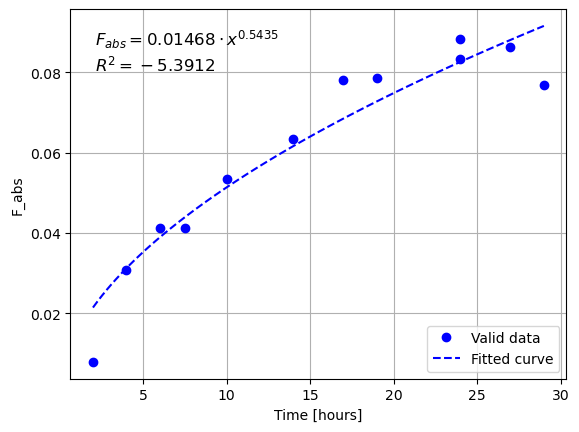

In [32]:
import matplotlib.pyplot as plt

# Plot all valid points 
plt.plot(time, F_abs, 'bo', label='Valid data')


# Fit to a power law
from scipy.optimize import curve_fit

# --- Fit to power law ---
def power_law(x, a, b):
    return a * x ** b

# Perform the fit
params, covariance = curve_fit(power_law, time , F_abs)
a, b = params

# Predict fitted values
F_abs_pred = power_law(F_abs , a, b)

# Compute R² manually
ss_res = np.sum((F_abs   - F_abs_pred) ** 2)
ss_tot = np.sum((F_abs   - np.mean(F_abs)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# Generate fitted curve
x_fit = np.linspace(min(time), max(time), 100)
y_fit = power_law(x_fit, a, b)

# Plot the fitted curve
plt.plot(x_fit, y_fit, 'b--', label='Fitted curve')

# Annotate equation and R² on the plot
eq_text = f"$F_{{abs}} = {a:.4g} \cdot x^{{{b:.4f}}}$\n$R^2 = {r_squared:.4f}$"
plt.text(0.05, 0.95, eq_text, transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

# Labels and legend
plt.xlabel("Time [hours]")
plt.ylabel("F_abs")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
